In [61]:
# Trabalho prático 3: análise exploratória de dados

# Separando os dados do dataset geral para cada um dos indicadores e salvando em um arquivo csv


In [62]:
import pandas as pd
from matplotlib import pyplot as plt


def remover_colunas(df: pd.DataFrame, nome_colunas: list[str]) -> pd.DataFrame:
    return df.drop(nome_colunas, axis=1)


def ler_arquivo(caminho: str = './', nome_arquivo='') -> pd.DataFrame:
    return pd.read_csv(caminho + nome_arquivo)


def gravar_arquivo(df: pd.DataFrame, caminho: str = './', nome_arquivo=''):
    df.to_csv(caminho + nome_arquivo)


def filtrar_dataset(df: pd.DataFrame, nome_coluna: str, filtro: list[str]) -> pd.DataFrame:
    expressao_query: str = f'`{nome_coluna}` in {filtro}'
    return df.query(expressao_query).reset_index(drop=True)


# dataset completo com todos os dados
df_completo = ler_arquivo(nome_arquivo='WDIData.csv')


# filtros para selecionar dos dados conforme o objetivo do exercicio

filtro_paises_sul_americanos = ['ARG', 'BRA', 'BOL',  'CHL',
                                'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN']

filtro_mortalidade = [
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)']

filtro_inflacao = ['Inflation, consumer prices (annual %)']

filtro_pib = ['GDP per capita growth (annual %)']

filtro_longevidade = ['Life expectancy at birth, total (years)']

# dataframe com os dados apenas dos paises sul americanos
df_paises_sul_americanos = filtrar_dataset(
    df=df_completo,
    nome_coluna='Country Code',
    filtro=filtro_paises_sul_americanos)

gravar_arquivo(df_paises_sul_americanos, 'df_paises_sul_americanos.csv')

# dataframe com os dados da mortalidade infantil
df_mort = filtrar_dataset(
    df=df_paises_sul_americanos,
    nome_coluna="Indicator Name",
    filtro=filtro_mortalidade)

gravar_arquivo(df_mort, 'df_mort_sul_ame.csv')

# dataframe com os dados do PIB
df_pib = filtrar_dataset(
    df=df_paises_sul_americanos,
    nome_coluna="Indicator Name",
    filtro=filtro_pib)

gravar_arquivo(df_pib, 'df_pib_sul_ame.csv')

# dataframe com os dados da inflacao
df_infl = filtrar_dataset(
    df=df_paises_sul_americanos,
    nome_coluna="Indicator Name",
    filtro=filtro_inflacao)

gravar_arquivo(df_infl, 'df_infl_sul_ame.csv')

# dataframe com os dados da longevidade
df_long = filtrar_dataset(
    df=df_paises_sul_americanos,
    nome_coluna="Indicator Name",
    filtro=filtro_longevidade)

gravar_arquivo(df_long, 'df_long_sul_ame.csv')


## Histograma


## Boxplot


Índice de Mortalidade Infantil


,Países,Válidas,Ausentes
0,Argentina,4,55
1,Bolivia,4,55
2,Brazil,4,55
3,Chile,4,55
4,Colombia,4,55
5,Ecuador,4,55
6,Guyana,4,55
7,Paraguay,4,55
8,Peru,4,55
9,Suriname,4,55


Não há dados suficientes para exibir o gráfico sobre  Índice de Mortalidade Infantil
Produto Interno Bruto


C:\Users\aliss\AppData\Local\Temp\ipykernel_8124\780726456.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(paises)


,Países,Válidas,Ausentes
0,Argentina,57,2
1,Bolivia,57,2
2,Brazil,57,2
3,Chile,57,2
4,Colombia,57,2
5,Ecuador,57,2
6,Guyana,57,2
7,Paraguay,57,2
8,Peru,57,2
9,Suriname,57,2


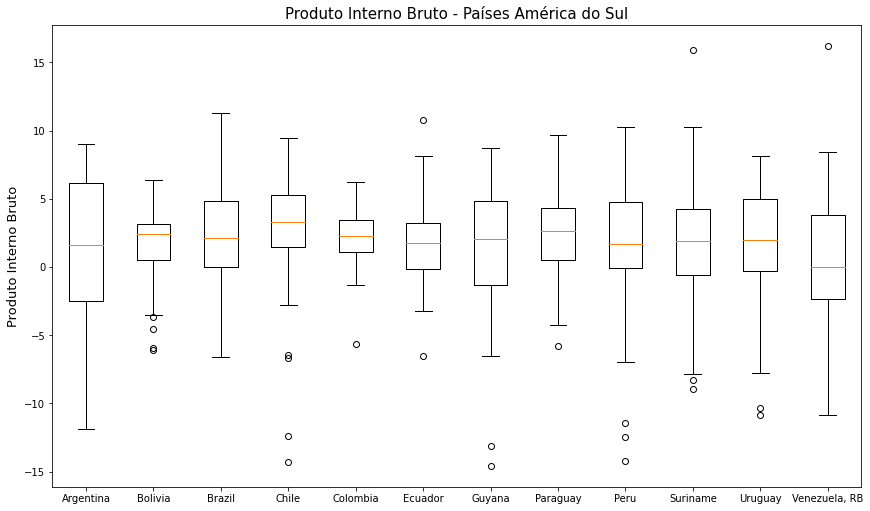

Índice de Inflação


,Países,Válidas,Ausentes
0,Argentina,0,59
1,Bolivia,58,1
2,Brazil,37,22
3,Chile,47,12
4,Colombia,58,1
5,Ecuador,58,1
6,Guyana,23,36
7,Paraguay,58,1
8,Peru,58,1
9,Suriname,58,1


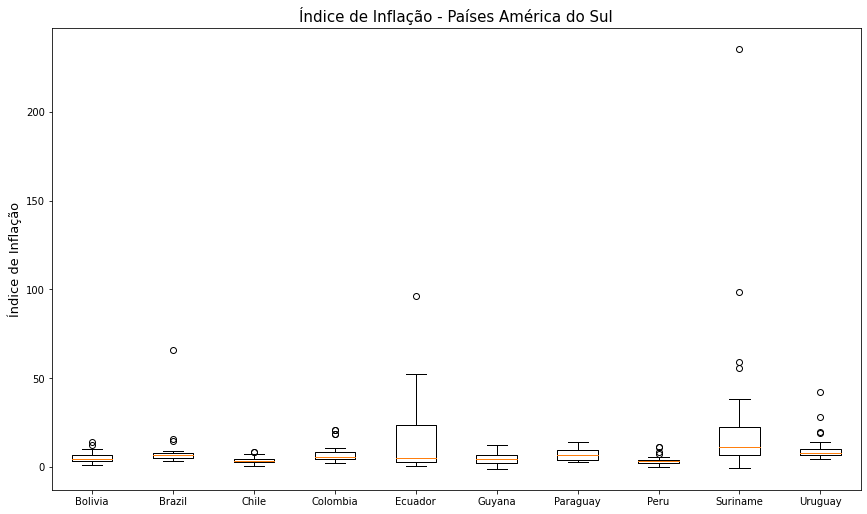

Expectativa média de vida


,Países,Válidas,Ausentes
0,Argentina,58,1
1,Bolivia,58,1
2,Brazil,58,1
3,Chile,58,1
4,Colombia,58,1
5,Ecuador,58,1
6,Guyana,58,1
7,Paraguay,58,1
8,Peru,58,1
9,Suriname,58,1


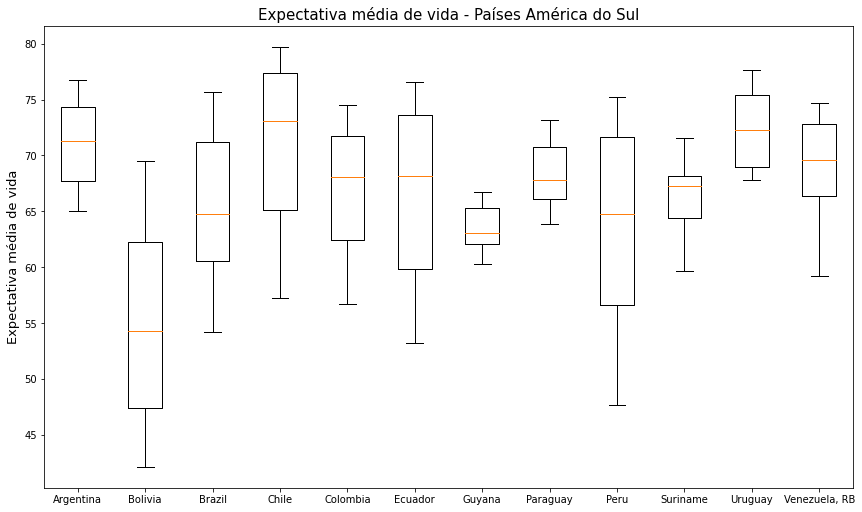

In [65]:
def apagar_colunas_nao_sao_anos(df: pd.DataFrame) -> pd.DataFrame:
    col_apagar = []
    for x in df.columns:
        if not (x.isnumeric()):
            col_apagar.append(x)

    return remover_colunas(df, col_apagar)


def conferir_dados_ausentes(df: pd.DataFrame, nome_problema: str, rotulos: list[str]) -> pd.Series:
    validos = []
    ausentes = []
    paises = []
    for indice, linha in df.iterrows():
        dados_pais: pd.Series = linha.to_frame()
        ausentes.append(dados_pais.isna().sum().values[0])
        valido = dados_pais.shape[0] - dados_pais.isna().sum(axis=0).values[0]
        validos.append(valido)
        if(valido < 20):
            df.drop(indice, inplace=True)
        else:
            pais = rotulos[indice]
            paises.append(pais)
    dados = pd.DataFrame(
        {'Países': rotulos, 'Válidas': validos, 'Ausentes': ausentes})
    print(nome_problema)
    display(dados)
    return pd.Series(paises)


def gerar_grafico_box_plot(df: pd.DataFrame, nome_eixo_y: str):

    rotulos = df_mort['Country Name'].reset_index(drop=True)

    # apaga coluna indice que é gerado ao ler
    df = apagar_colunas_nao_sao_anos(df)

    rotulos_validos = conferir_dados_ausentes(df, nome_eixo_y, rotulos)

    if(len(rotulos_validos)):
        df.dropna(axis=1, inplace=True)

        fig, ax = plt.subplots()
        fig.set_size_inches(14.5, 8.5, forward=True)
        plt.title(nome_eixo_y + " - Países América do Sul", fontsize=15)
        plt.ylabel(nome_eixo_y, fontsize=13)
        ax.boxplot(df.T, labels=rotulos_validos)
        plt.show()
    else:
        print("Não há dados suficientes para exibir o gráfico sobre ", nome_eixo_y)

dataframe_mort = ler_arquivo('df_mort_sul_ame.csv')
gerar_grafico_box_plot(
    dataframe_mort, "Índice de Mortalidade Infantil")


dataframe_pib = ler_arquivo('df_pib_sul_ame.csv')
gerar_grafico_box_plot(dataframe_pib, "Produto Interno Bruto")

dataframe_infl = ler_arquivo('df_infl_sul_ame.csv')
gerar_grafico_box_plot(dataframe_infl, "Índice de Inflação")

dataframe_long = ler_arquivo('df_long_sul_ame.csv')
gerar_grafico_box_plot(
    dataframe_long, "Expectativa média de vida")
